In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_pickle("golden_data_dummy.pkl")
df2=pd.read_pickle("golden_data_not_dummy.pkl")
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control,make_Audi,make_Opel,make_Renault,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,4.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1

In [4]:
df.shape

(14990, 136)

<AxesSubplot:>

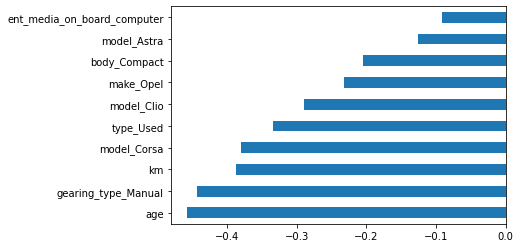

In [8]:
df.corr()['price'].sort_values().head(10).plot.barh()

<AxesSubplot:>

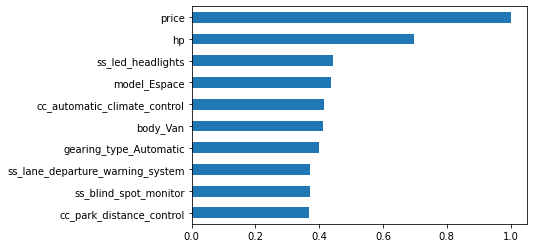

In [9]:
df.corr()['price'].sort_values().tail(10).plot.barh()

<AxesSubplot:xlabel='price', ylabel='Density'>

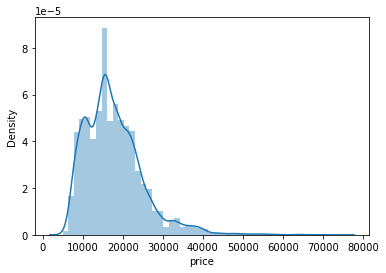

In [10]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price'>

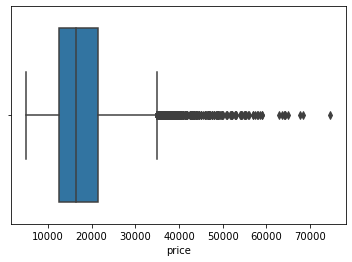

In [19]:
sns.boxplot(df.price)

In [20]:
X = df.drop(['price'], axis=1)
y = df.price

In [21]:
X.shape

(14990, 135)

In [22]:
y.shape

(14990,)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# a function to evaluate our regression results.

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

## 1. Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.intercept_

12863.602080586154

In [29]:
# coefficient for each columns to predict new data
lm.coef_

array([-1.07324683e+00,  1.00166983e+02, -3.66043273e-02, -4.31072316e+01,
       -2.11696074e+01,  2.90467232e+02,  1.47113286e+02, -4.26342916e+02,
       -2.45857390e+02,  1.44234756e+01, -2.93066855e+02, -1.16108907e+01,
       -1.62343964e+02, -2.49233364e+02,  3.14435352e+01, -8.25700143e+02,
       -1.68410690e+02, -6.39788701e+01, -2.52627947e+02, -3.36816275e+02,
       -2.21937795e+02,  6.50316165e+02,  7.88768070e+02,  5.31963200e+02,
        5.00522695e+02, -4.61395475e+02, -5.70148532e+02,  1.39061715e+02,
        1.34225323e+02,  2.11425107e+02,  1.86571437e+01, -4.13212783e+02,
        1.22899206e+02, -1.10716807e+02, -1.60110802e+03, -5.85909249e+02,
        1.44819775e+02,  9.04394102e+02, -7.91700474e+01, -8.95007277e+01,
        7.50148324e+00,  3.55613012e+02, -1.90184859e+02, -1.39196020e+03,
       -1.95752826e+02,  3.11567861e+02,  3.60531806e+01, -8.14980053e+01,
        3.51648412e+02,  3.35134852e+02, -4.18921989e+01,  2.67668171e+02,
       -2.30397964e+02,  

In [30]:
y_pred = lm.predict(X_test)

In [31]:
eval_metrics(y_test, y_pred)

r2_score: 0.8917673810996833 
 mae: 1672.3867626669671 
 mse: 5481554.524313098 
 rmse: 2341.271988538089


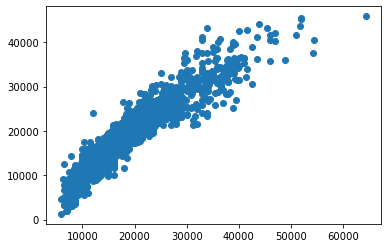

In [32]:
plt.scatter(y_test, y_pred)

In [34]:
# I'd like to try
# sns.scatterplot(data=[ytest])

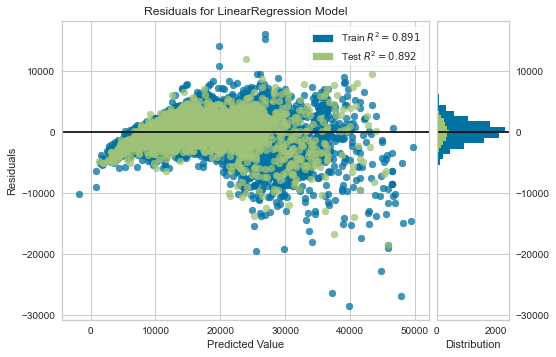

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [35]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [36]:
my_dict = {'Actual' : y_test, 'Pred' : y_pred}

In [37]:
compare = pd.DataFrame(my_dict)

In [40]:
compare.sample(10)

,Actual,Pred
10442,10990,14469.005401
1202,15900,17020.173773
88,18490,18225.339787
13644,6990,4936.859387
14471,19190,19743.562059
11838,24490,24165.486789
3998,19750,17701.539576
15098,23099,29281.895202
14663,10880,12026.794549
10814,12750,16670.034971


### Crossvalidation

it changes the sets to find average

In [41]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.8853675809888802

In [42]:
cv_scores

array([0.88213508, 0.88024083, 0.89031947, 0.88202718, 0.89211535])

## 2. Ridge Regression

In [43]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [44]:
ridge_model = Ridge(normalize=True) # if not scaled better to normalize here

In [45]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [46]:
eval_metrics(y_test, y_pred)

r2_score: 0.8390485500575235 
 mae: 1963.3528962238236 
 mse: 8151555.026488906 
 rmse: 2855.092822744806


In [47]:
dir(ridge_model) # to see the functions you can run with this model

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 'alpha',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'max_iter',
 'n_features_in_',
 'n_iter_',
 'normalize',
 'predict',
 'random_state',
 'score',
 'set_params',
 'solver',
 'tol']

In [52]:
ridge_model.alpha #gives best alpha score

1.0

In [49]:
alpha_space = np.linspace(0.1, 20, 100) # a variable to use in ridge crossvalidation 

In [50]:
alpha_space 

array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.13030303,  6.33131313,  6.53232323,  6.73333333,  6.93434343,
        7.13535354,  7.33636364,  7.53737374,  7.73838384,  7.93939394,
        8.14040404,  8.34141414,  8.54242424,  8.74343434,  8.94444444,
        9.14545455,  9.34646465,  9.54747475,  9.74848485,  9.94949495,
       10.15050505, 10.35151515, 10.55252525, 10.75353535, 10.95454545,
       11.15555556, 11.35656566, 11.55757576, 11.75858586, 11.95959596,
       12.16060606, 12.36161616, 12.56262626, 12.76363636, 12.96464646,
       13.16565657, 13.36666667, 13.56767677, 13.76868687, 13.96

In [51]:
ridge_cv = RidgeCV(alphas = alpha_space, normalize=True, cv=5)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, normalize=True)

In [53]:
ridge_cv.alpha_ # best alpha score among our trail above

0.1

In [54]:
ridge_model = Ridge(alpha=0.1, normalize=True) # better to put best alpha score if alpha = 0 it is mean Linear regression so this model tend to have smaller alpha which means linear reg is better than this
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [55]:
eval_metrics(y_test, y_pred)

r2_score: 0.8908685496674182 
 mae: 1663.8811495596701 
 mse: 5527076.785108294 
 rmse: 2350.973582392685


## 3. Lasso Regression

In [56]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [57]:
lasso_model = Lasso(normalize=True) # bear in mind alpha is 1 here
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8840377602740636 
 mae: 1698.8273169126867 
 mse: 5873029.279690901 
 rmse: 2423.4333660513344


In [58]:
lasso_cv = LassoCV(alphas = alpha_space, normalize=True, cv=5)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([ 0.1       ,  0.3010101 ,  0.5020202 ,  0.7030303 ,  0.9040404 ,
        1.10505051,  1.30606061,  1.50707071,  1.70808081,  1.90909091,
        2.11010101,  2.31111111,  2.51212121,  2.71313131,  2.91414141,
        3.11515152,  3.31616162,  3.51717172,  3.71818182,  3.91919192,
        4.12020202,  4.32121212,  4.52222222,  4.72323232,  4.92424242,
        5.12525253,  5.32626263,  5.52727273,  5.72828283,  5.92929293,
        6.1303030...
       14.17070707, 14.37171717, 14.57272727, 14.77373737, 14.97474747,
       15.17575758, 15.37676768, 15.57777778, 15.77878788, 15.97979798,
       16.18080808, 16.38181818, 16.58282828, 16.78383838, 16.98484848,
       17.18585859, 17.38686869, 17.58787879, 17.78888889, 17.98989899,
       18.19090909, 18.39191919, 18.59292929, 18.79393939, 18.99494949,
       19.1959596 , 19.3969697 , 19.5979798 , 19.7989899 , 20.        ]),
        cv=5, normalize=True)

In [59]:
lasso_cv.alpha_

0.1

In [60]:
lasso_model = Lasso(alpha=0.1, normalize=True) # bear in mind alpha is 1 here as default
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8917796626649902 
 mae: 1668.1568590125219 
 mse: 5480932.511554304 
 rmse: 2341.1391482682748


In [61]:
# try w/o normalization

lasso_model = Lasso(alpha=1.9, normalize=False) # normalization (scaling) is not always helpful you need to check.
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8922267238842932 
 mae: 1669.6202221841131 
 mse: 5458290.627118589 
 rmse: 2336.298488446754


In [62]:
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [63]:
# Ridge never gets 0 coef however lasso gives 0 coef for unnecessary features.
feature_coef.head()

,features,coef
0,displacement,-1.037187
1,hp,101.999072
2,km,-0.036668
3,ss_abs,-15.806944
4,ss_adaptive_cruise_control,0.000000


In [64]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features) # to see how many features left in the model. Sometimes, it si better to have less features to make prediction.

109

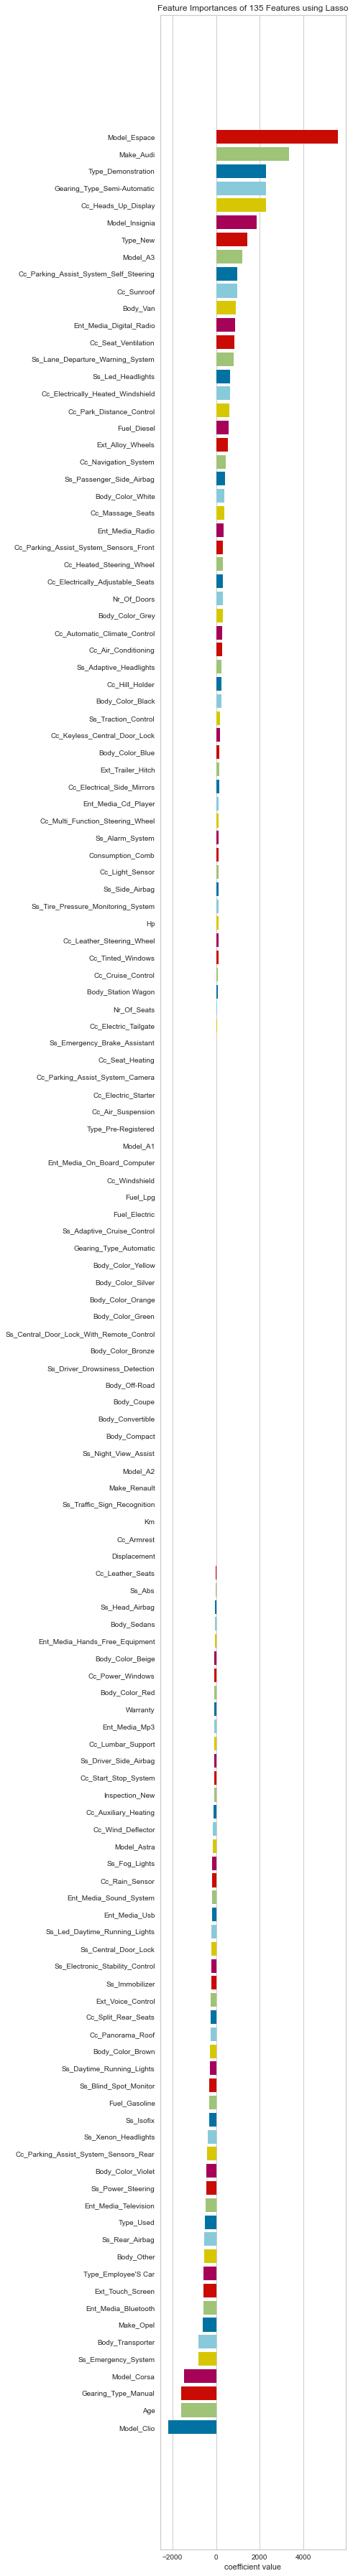

<AxesSubplot:title={'center':'Feature Importances of 135 Features using Lasso'}, xlabel='coefficient value'>

In [65]:
# visualising coefficient by yellowbricks

from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(500, 3600))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

## 4. Random Forest Regressor

In [66]:
from sklearn.ensemble import RandomForestRegressor # this is different than randomforestclassifier

In [67]:
rf_reg = RandomForestRegressor()

In [68]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
y_pred = rf_reg.predict(X_test)

In [72]:
eval_metrics(y_test, y_pred)

r2_score: 0.9555010390738936 
 mae: 858.5634153530117 
 mse: 2253696.557193966 
 rmse: 1501.2316800527378


In [73]:
cv_scores = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=5)
cv_scores.mean()

0.9530606242830381

### RF Feature Importance

Better than Ridge and Lasso

In [74]:
rf_reg.feature_importances_

array([1.08710888e-02, 4.62935247e-01, 7.38013034e-02, 2.35032285e-04,
       6.53125935e-04, 3.80228965e-04, 6.78108552e-04, 4.39082300e-04,
       3.32689834e-04, 2.13961905e-04, 3.86436423e-04, 1.55308494e-04,
       2.63896527e-04, 3.18564604e-04, 4.08917715e-04, 2.31636112e-04,
       6.61623760e-04, 2.05955699e-04, 4.51317524e-04, 5.98986702e-04,
       4.01590085e-04, 1.60346554e-03, 5.89390261e-04, 4.47610856e-05,
       2.11616761e-04, 1.62626260e-03, 2.09200038e-04, 3.31823219e-04,
       4.49398118e-04, 3.80988355e-04, 2.46966432e-04, 6.18773525e-04,
       6.32407980e-03, 4.45958682e-04, 1.84226929e-01, 4.14627715e-03,
       5.38625437e-04, 4.13500548e-04, 5.05591870e-04, 4.24036679e-04,
       3.55184841e-04, 8.19890449e-04, 5.61456243e-04, 7.90491557e-05,
       5.75789921e-04, 1.17626007e-03, 2.48859060e-03, 8.04730964e-04,
       1.69321895e-04, 5.45158697e-05, 5.19452432e-04, 6.89086764e-04,
       1.08382641e-04, 4.66385454e-04, 0.00000000e+00, 4.96308455e-04,
      

In [75]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_},
                          index = X_train.columns)
importance.sort_values(by="importance", ascending = False).head(10) # here the coefficient give information about how importand a feature is.

,importance
hp,0.462935
age,0.184227
km,0.073801
make_Audi,0.060599
model_Espace,0.060376
gearing_type_Manual,0.018804
cc_park_distance_control,0.018181
displacement,0.010871
model_Astra,0.010518
model_A3,0.009272


In [77]:
df2.head() # not getdummies on some columns

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,Sedans,Black,Automatic,1,15770,3,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,5.6,Sedans,Red,Automatic,0,14500,2,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,gasoline,3.0,4.0,Used,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,Sedans,Black,Automatic,0,14640,3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,diesel,4.0,4.0,Used,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.8,Sedans,Brown,Automatic,0,14500,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,diesel,3.0,4.0,Used,0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,Sedans,Black,Automatic,1,16790,3,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,diesel,5.0,5.0,Used,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [78]:
df2.shape

(14994, 98)

### Feature selection with RF

In [79]:
new_list = ['age', 'model', 'hp', 'km']

In [80]:
X = df2[new_list] # we need original version of data before get dummies for feature selection
y = df2['price']
X = pd.get_dummies(X)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [83]:
y_pred = rf_reg.predict(X_test)

In [84]:
eval_metrics(y_test, y_pred)

r2_score: 0.8994677100509211 
 mae: 1465.954960404082 
 mse: 5415699.083706268 
 rmse: 2327.165461179387


In [85]:
accuraries = cross_val_score(estimator=rf_reg, X=X_train, y=y_train, cv=5)
accuraries.mean()

0.8910465829894012

### RF model tunning

In [86]:
rf_params = {"n_estimators":[50, 100, 300],
              "max_depth":[3,5,7],
              "max_features": [2,4,6,8],
              "min_samples_split": [2,4,6]}

In [87]:
rf_cv_model = GridSearchCV(rf_reg, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


In [88]:
rf_cv_model.best_params_

{'max_depth': 7,
 'max_features': 6,
 'min_samples_split': 6,
 'n_estimators': 100}

In [92]:
rf_tuned = RandomForestRegressor(max_features = 6,
                                min_samples_split = 6,
                                 n_estimators = 100)
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_features=6, min_samples_split=6)

In [93]:
y_pred = rf_tuned.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9085461336273944 
 mae: 1431.5430888051442 
 mse: 4926642.1819933215 
 rmse: 2219.6040597352767


In [94]:
accuraries = cross_val_score(estimator=rf_tuned, X=X_train, y=y_train, cv=5)
accuraries.mean()

0.9006311708701155

## 5. XGBoost Regressor

In [95]:
X=df.drop(['price'], axis=1)
y=df['price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [96]:
import xgboost

In [97]:
model_xg = xgboost.XGBRegressor()
model_xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
y_pred =model_xg.predict(X_test)

In [99]:
eval_metrics(y_test, y_pred)

r2_score: 0.9547463565499206 
 mae: 944.4072768890197 
 mse: 2291918.2453110595 
 rmse: 1513.908268459836


### 4 features only

In [101]:
new_list=["hp", "age", "km", "model"]

In [102]:
X=df2[new_list]
y=df2['price']
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [103]:
model = xgboost.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.9154993277074478 
 mae: 1428.4545652587321 
 mse: 4552071.913801375 
 rmse: 2133.558509580034


### gridsearch with xgboost

In [105]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [111]:
from sklearn.model_selection import GridSearchCV
xgb_cv_model  = GridSearchCV(model,xgb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
exception calling callback for <Future at 0x2346e31f390 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\mbayr\Anaconda3\lib\site-packages\joblib\_parallel_backends.py", lin

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [107]:
xgb_cv_model.best_params_

NameError: name 'xgb_cv_model' is not defined

In [108]:
xgb_tuned = xgboost.XGBRegressor(subsample = 1, 
                         learning_rate = 0.1, 
                         max_depth = 7, 
                         n_estimators = 100).fit(X_train, y_train)

In [109]:
y_pred = xgb_tuned.predict(X_test)
eval_metrics(y_test,y_pred)

r2_score: 0.9162275348212494 
 mae: 1428.0082275146403 
 mse: 4512843.218215498 
 rmse: 2124.345362274105
